<a href="https://colab.research.google.com/github/ochamodev/lab1_textmining_19001395_v/blob/main/lab1_text_mining_19001395_v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab1: Image operations.
# Course: Text mining and image recognition
# Student: Otto Chamo

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading images

In [9]:
img1 = cv2.imread("imgs/dread1.jpeg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [10]:
img2 = cv2.imread("imgs/images.jpeg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [11]:
img1zip = cv2.imread("imgs/imagen1")

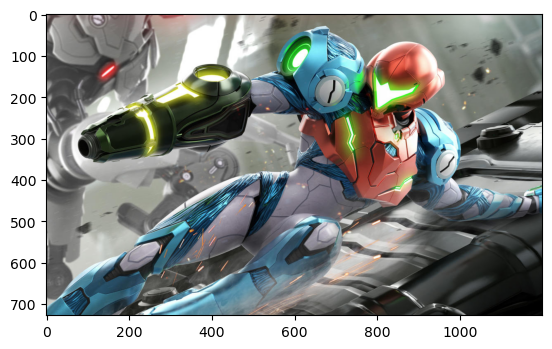

In [12]:
plt.imshow(img1)
plt.show()

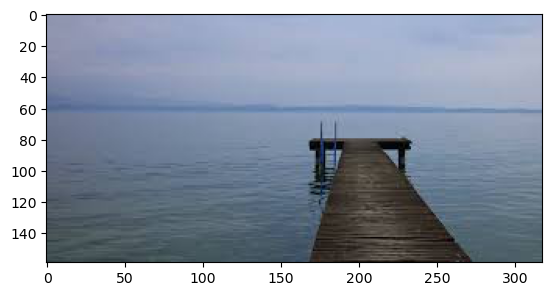

In [13]:
plt.imshow(img2)
plt.show()

# Problem 1.

![alt text](imgs/problems/pr1.png)

In [14]:
blueChannel = 1
greenChannel = 2
redChannel = 3
redAndGreenChannel = 10
greenAndBlueChannel = 20
blueAndRedChannel = 30
def channelActivation(img: np.ndarray, color: int):
  height = img.shape[0]
  width = img.shape[1]

  imgOut = np.zeros_like(img) # lienzo en blanco

  for i in range(0, height):
    for j in range(0, width):
      pixel = img[i, j]

      red = pixel[0]
      green = pixel[1]
      blue = pixel[2]

      if (color == blueChannel):
        imgOut[i, j] = [0, 0, blue]
      elif (color == greenChannel):
        imgOut[i, j] = [0, green, 0]
      elif (color == redChannel):
        imgOut[i, j] = [red, 0, 0]
      elif (color == redAndGreenChannel):
        imgOut[i, j] = [red, green, 0]
      elif (color == greenAndBlueChannel):
        imgOut[i, j] = [0, green, blue]
      elif (blueAndRedChannel):
        imgOut[i, j] = [red, 0, blue]

  return imgOut


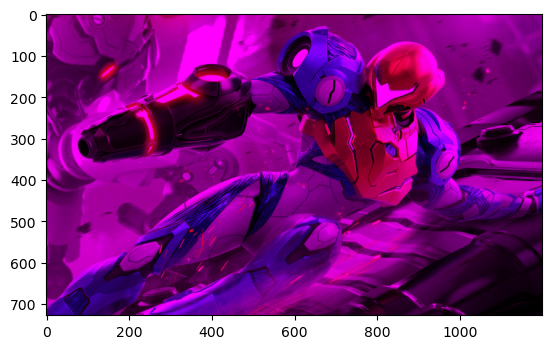

In [15]:
imgChannel = channelActivation(img1, blueAndRedChannel)
plt.imshow(imgChannel)
plt.show()

# Problem 2
![alt text](imgs/problems/pr2.png)

## Loading images

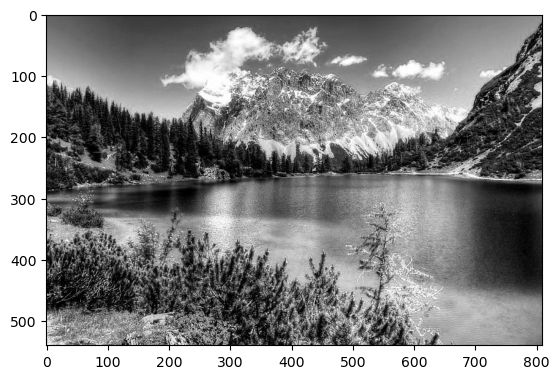

In [38]:
img1P2blue = cv2.imread("./imgs/imagen1/imagen1_salida_gray_azul.jpg")
img1P2red = cv2.imread("./imgs/imagen1/imagen1_salida_gray_rojo.jpg")
img1P2green = cv2.imread("./imgs/imagen1/imagen1_salida_gray_verde.jpg")

plt.imshow(img1P2green)
plt.show()

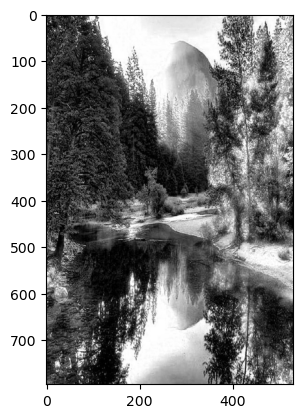

In [37]:
img2P2blue = cv2.imread("./imgs/imagen2/imagen2_salida_gray_azul.jpg")
img2P2red = cv2.imread("./imgs/imagen2/imagen2_salida_gray_rojo.jpg")
img2P2green = cv2.imread("imgs/imagen2/imagen2_salida_gray_verde.jpg")

plt.imshow(img2P2red)
plt.show()

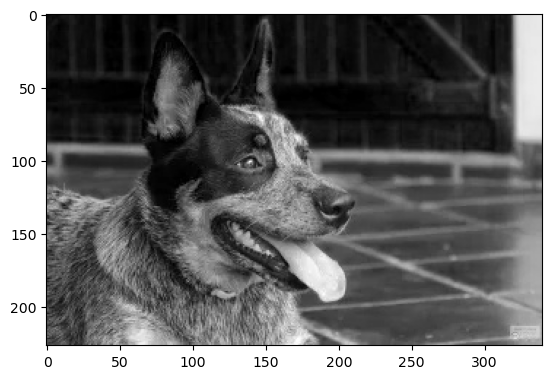

In [33]:
img3P2blue = cv2.imread("./imgs/perro/perro_salida_gray_azul.jpg")
img3P2red = cv2.imread("./imgs/perro/perro_salida_gray_rojo.jpg")
img3P2green = cv2.imread("./imgs/perro/perro_salida_gray_verde.jpg")

plt.imshow(img3P2blue)
plt.show()

## Restoring images to original form

In [35]:
def reconstructImage(redImg, blueImg, greenImg):
    height = redImg.shape[0]
    width = redImg.shape[1]

    imgReconstruction = np.zeros((height, width, 3), dtype=np.uint8)

    for i in range(0, height):
        for j in range(0, width):
            red = redImg[i, j][0]
            blue = blueImg[i, j][0]
            green = greenImg[i, j][0]
            
            imgReconstruction[i, j] = [red, green, blue]

    return imgReconstruction



## Reconstruction of lake 1

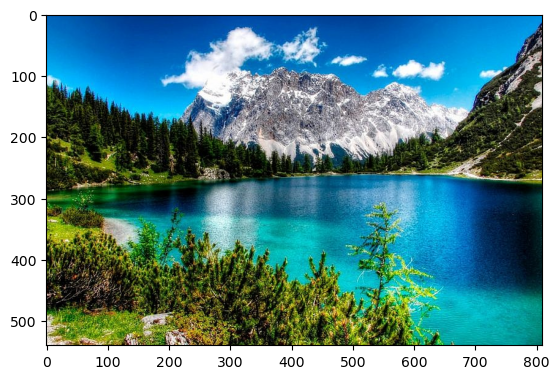

In [39]:
lake1 = reconstructImage(redImg= img1P2red, blueImg= img1P2blue, greenImg= img1P2green)
plt.imshow(lake1)
plt.show()

## Reconstruction of lake 1

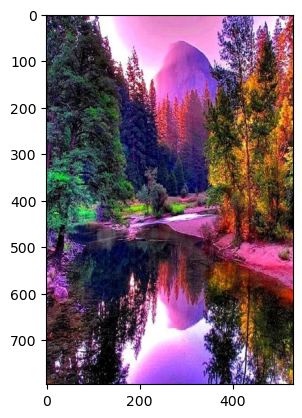

In [40]:
lake2 = reconstructImage(redImg= img2P2red, blueImg= img2P2blue, greenImg= img2P2green)
plt.imshow(lake2)
plt.show()

## Reconstruction of dog image

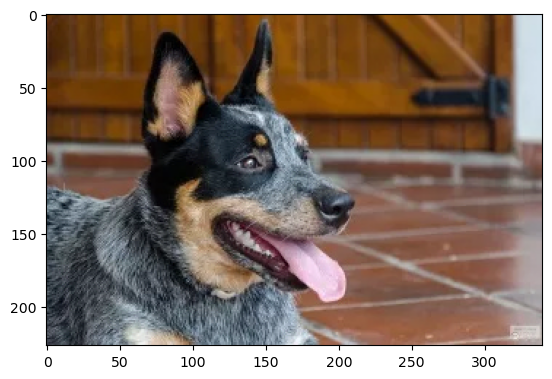

In [36]:
dogReconstruction = reconstructImage(redImg= img3P2red, blueImg= img3P2blue, greenImg= img3P2green)
plt.imshow(dogReconstruction)
plt.show()


# Problem 3

![alt text](imgs/problems/pr3.png)

In [42]:
def imgToGray3d(img: np.ndarray) -> np.ndarray:
    height = img.shape[0]
    width = img.shape[1]

    imgGrayRedChannel = np.zeros_like(img)
    imgGrayBlueChannel = np.zeros_like(img)
    imgGrayGreenChannel = np.zeros_like(img)

    for i in range(0, height):
        for j in range(0, width):
            pixel = img[i, j]
            
            red = pixel[0]
            green = pixel[1]
            blue = pixel[2]

            imgGrayRedChannel[i, j] = [red, red, red]
            imgGrayGreenChannel[i, j] = [green, green, green]
            imgGrayBlueChannel[i, j] = [blue, blue, blue]
    
    return imgGrayRedChannel, imgGrayGreenChannel, imgGrayBlueChannel



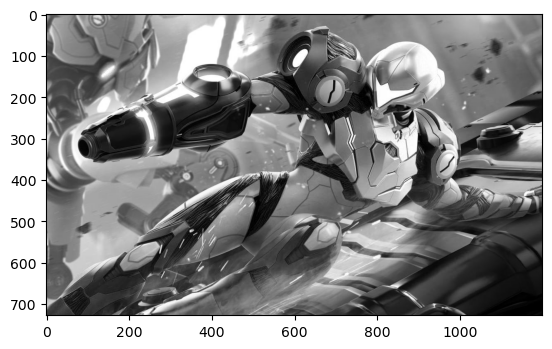

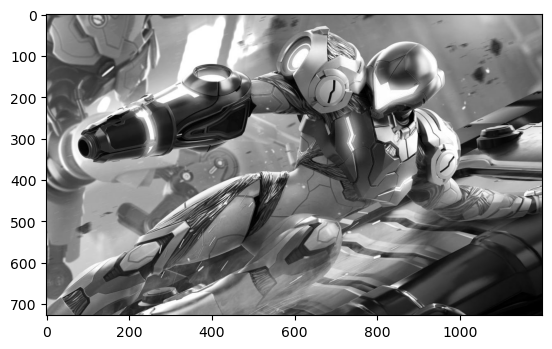

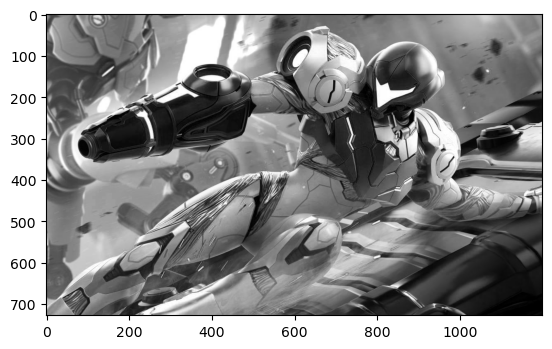

In [46]:
red, green, blue = imgToGray3d(img1)
cv2.imwrite("./output/dread_gray_red.jpg", red)
cv2.imwrite("./output/dread_gray_green.jpg", green)
cv2.imwrite("./output/dread_gray_blue.jpg", blue)
plt.imshow(red)
plt.show()
plt.imshow(green)
plt.show()
plt.imshow(blue)
plt.show()

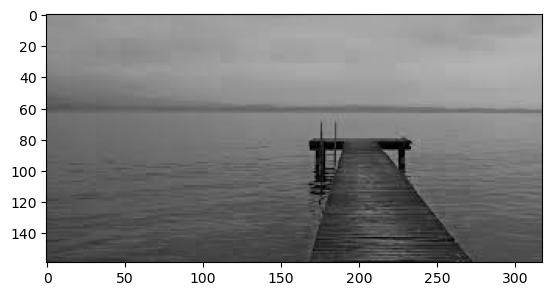

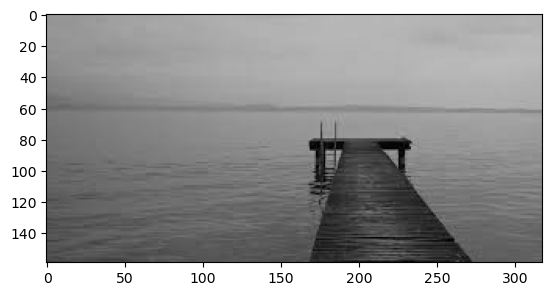

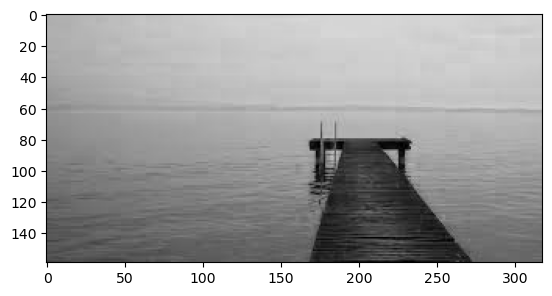

In [45]:
red, green, blue = imgToGray3d(img2)
cv2.imwrite("./output/images_gray_red.jpg", red)
cv2.imwrite("./output/images_gray_green.jpg", green)
cv2.imwrite("./output/images_gray_blue.jpg", blue)
plt.imshow(red)
plt.show()
plt.imshow(green)
plt.show()
plt.imshow(blue)
plt.show()

# Problem 4

In [53]:
def calculateHistogram(channel: np.ndarray):
    calc = np.zeros(256, dtype=int)
    for pixel in channel.flatten():
        calc[pixel] += 1
    return calc

def imgToHistogram(img):
    height = img.shape[0]
    width = img.shape[1]
    imgRed = np.zeros_like(img)
    imgBlue = np.zeros_like(img)
    imgGreen = np.zeros_like(img)
    imgGray = np.zeros_like(img)

    for i in range(0, height):
        for j in range(0, width):
            pixel = img[i, j]

            red = pixel[0]
            blue = pixel[1]
            green = pixel[2]

            imgRed[i, j] = [red, red, red]
            imgGreen[i, j] = [green, green, green]
            imgBlue[i, j] = [blue, blue, blue]
            imgGray[i, j] = pixel.mean()

    histBlue = calculateHistogram(imgBlue)
    histGreen = calculateHistogram(imgGreen)
    histRed = calculateHistogram(imgRed)
    histGray = calculateHistogram(imgGray)
    x = range(256)

    plt.bar(x, histBlue, color = 'blue', alpha = 0.6)
    plt.axvline(np.mean(imgBlue), color = 'black', linewidth=1)
    plt.show()

    plt.bar(x, histGreen, color = 'blue', alpha = 0.6)
    plt.axvline(np.mean(imgGreen), color = 'black', linewidth=1)
    plt.show()

    plt.bar(x, histRed, color = 'blue', alpha = 0.6)
    plt.axvline(np.mean(imgRed), color = 'black', linewidth=1)
    plt.show()
    
    plt.bar(x, histGray, color = 'blue', alpha = 0.6)
    plt.axvline(np.mean(imgGray), color = 'black', linewidth=1)
    plt.show()



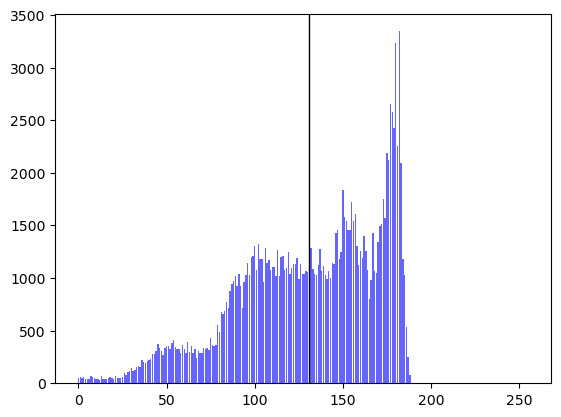

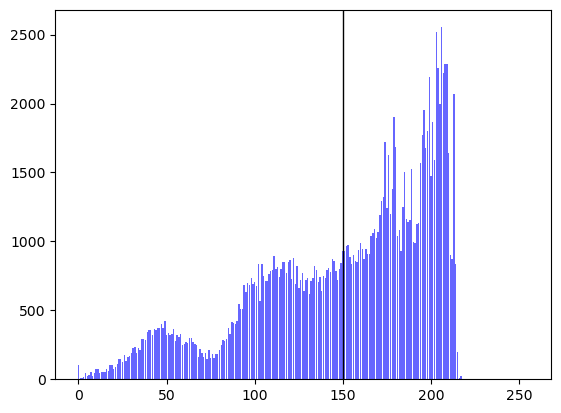

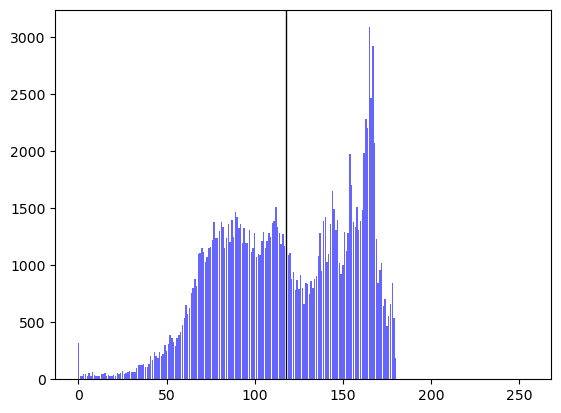

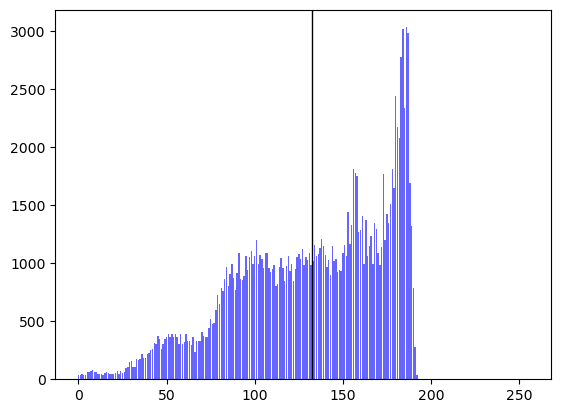

In [55]:
imgToHistogram(img2)

# Problem 5

![alt text](imgs/problems/pr5.png)

In [65]:
def imgToWeightedGray(img):
    weights = [0.3, 0.59, 0.11]

    imgGray = np.dot(img[..., :3], weights).astype(np.uint8)

    return imgGray


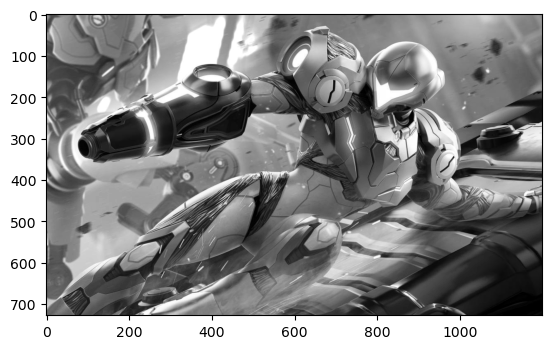

In [66]:
weightedImg1 = imgToWeightedGray(img1)
plt.imshow(weightedImg1, cmap="gray")
plt.show()

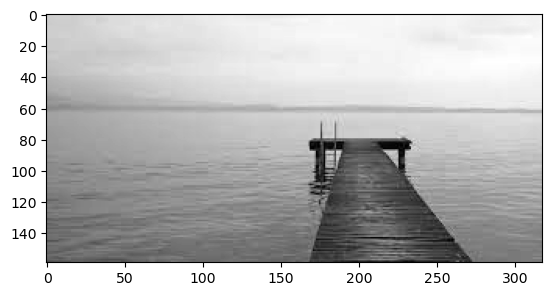

In [67]:
weightedImg2 = imgToWeightedGray(img2)
plt.imshow(weightedImg2, cmap="gray")
plt.show()

# Problem 6
![alt text](imgs/problems/pr6.png)

## HSV color space

HSV (hue, saturation, value) is another color scheme to represent colors in graphics software. Unlike the other schemes, this one is closer to how humans perceive color.

### Components
- **Hue:** Corresponds to color(tint or hue). Represented in values ranging from 0 to 360.
- **Saturation:** It is the intensity of the color.
- **Value:** Determines the brightness.

### Mapping colors
Transformation of RGB to HSV implies a calculation of the components previously mentioned.

We have to find the min and max values among the RGB channels.

We map Hue based on the channels RGG and max and min values, then we proceed to saturation calculating the difference between max and min values and Hue, lastly the value component is obtained from the max value.

### Visualization of RGB and HSV color schemes

![alt text](imgs/rgb_hsl_visualization.png)

### Applications of HSV

- Object detection: For identifying and tracking objects of specific color in videos.
- Improved color consistency: More consistent and accurate color detection compared to RGB.


### Sources

[Signal processing](https://www.datasciencecentral.com/image-classification-with-hsv-color-model-processing/)
[DataTechNotes](https://www.datatechnotes.com/2023/07/color-detection-with-hsv-color-space-in.html)